<a href="https://colab.research.google.com/github/valki45/inteligencia-artificial/blob/main/combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo #permite acceder fácilmente a los conjuntos de datos del repositorio UCI Machine Learning Repository


In [ ]:
from ucimlrepo import fetch_ucirepo  # Importa la función para descargar datasets de la UCI

# Descarga el dataset "Auto MPG" (id=9 en la base UCI)
auto_mpg = fetch_ucirepo(id=9)

# Separa los datos:
X = auto_mpg.data.features   # Características (por ejemplo: cilindros, peso, aceleración, etc.)
y = auto_mpg.data.targets    # Variable objetivo (en este caso, el consumo de combustible MPG)


In [ ]:
X.head() #mostramos el conjunto x

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [ ]:
y.head() #mostramos en conjunto y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
X.info() #cuantas variabes nulas tiene el conjunto X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [ ]:
y.info() #cuantas variabes nulas tiene el conjunto y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


In [ ]:
df.info() #cuantas variabes nulas tiene el conjunto

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [ ]:
X = df.drop('mpg', axis=1) #nuevamente debemos definir los conjuntos X e Y
y = df['mpg']


In [ ]:
from sklearn.model_selection import train_test_split #Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


In [ ]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler #Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf #Definir el modelo de red neuronal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam #Crear un optimizador Adam con una tasa de aprendizaje del 0.001

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],     #Se compila el modelo utilizando el optimizador Adam y la función de pérdida error cuadrático medio  (mean_squared_error) .
)

In [ ]:
history = model.fit( # se entrena el modelo
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 425.2286 - root_mean_squared_error: 20.1761 - val_loss: 21.4302 - val_root_mean_squared_error: 4.6293
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3680 - root_mean_squared_error: 3.5063 - val_loss: 13.0636 - val_root_mean_squared_error: 3.6144
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.2136 - root_mean_squared_error: 3.4721 - val_loss: 11.8767 - val_root_mean_squared_error: 3.4463
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4174 - root_mean_squared_error: 3.0617 - val_loss: 11.0904 - val_root_mean_squared_error: 3.3302
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5017 - root_mean_squared_error: 2.8883 - val_loss: 12.6848 - val_root_mean_squared_error: 3.5616


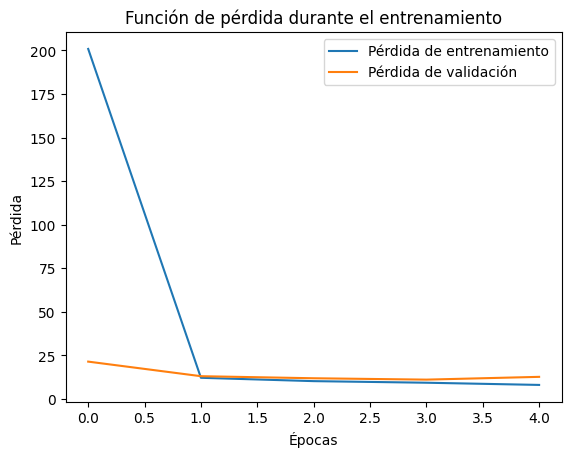

In [ ]:
import matplotlib.pyplot as plt #Gráficando la funcion de pérdida

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1) #Evaluar el modelo en el conjunto de prueba
print(f'Test Mean Absolute Error: {test_mae:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.3293 - root_mean_squared_error: 3.5099 
Test Mean Absolute Error: 3.56


In [ ]:
predictions = model.predict(X_test) #Hacer predicciones y comparar las predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
     Actual  Predicted
82     23.0  20.567720
167    29.0  26.190208
356    32.4  31.976948
120    19.0  17.120499
385    38.0  36.139221


In [ ]:
# otras metricas
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

R²: 0.8170175437427344
MSE: 12.684760203417621
